# **MÓDULO 17 - Projeto de Credit Score - Parte 1 - Processamento dos dados**


Essa é a primeira etapa do processo de Credit Score que vocês desenvolverão durante nosso curso.
Nessa primeira etapa vocês irão aplicar os passos aprendidos nos módulos de pré processamento para preparar a base de vocês para o desenvolvimento do modelo.

O termo "credit score" se refere a uma pontuação numérica que representa a credibilidade de um indivíduo em termos de cumprimento de obrigações financeiras, como pagar contas de empréstimos, cartões de crédito, entre outros. Essa pontuação é calculada com base em diversas informações financeiras e de crédito do indivíduo, como histórico de pagamentos, níveis de endividamento, tempo de crédito, tipos de crédito utilizados, entre outros.

O objetivo de um modelo de credit score é prever o risco de um indivíduo se tornar inadimplente com suas obrigações financeiras. Em outras palavras, o modelo avalia a probabilidade de um indivíduo não cumprir com os pagamentos de empréstimos ou outros compromissos financeiros. Essa previsão é fundamental para instituições financeiras, como bancos e credores, na tomada de decisão sobre a concessão de crédito. Um modelo de credit score eficaz pode ajudar essas instituições a avaliar o risco de emprestar dinheiro a um determinado indivíduo e, assim, tomar decisões mais informadas sobre a aprovação ou negação de crédito, bem como sobre os termos e condições desses empréstimos.

**Atenção:** Notem que esse projeto é diferente da base que tenho trabalhado com vocês em aula, apesar de se tratar de uma base bancária durante a aula falamos sobre a variável Churn a ser prevista, nesse caso a previsão seria do valor do Score de Crédito.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import sklearn
from sklearn.preprocessing import LabelEncoder

In [2]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

df.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


Legenda dos dados:

*   **Age** : Idade dos nossos clientes.

*   **Income** : Salário Mensal.

*   **Gender** : Gênero.

*   **Education** : Nível de escolaridade dos clientes.

*   **Marital** : Status Civilmente.

*   **Number of Children** : Quantidade de filhos.

*   **Home** : Tipo de residência, alugada ou própria.

*   **Credit Score** : Nossa variável preditora, o score de crédito dos clientes.


# Etapa 1: Relize os passos que vimos no módulo 14, de pré processamento dos dados.

**A) Verifique os tipos de dados, fazendo as transformações quando necessário.**


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 130 non-null    float64
 1   Gender              164 non-null    object 
 2   Income              164 non-null    object 
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 10.4+ KB


In [4]:
df['Income'] = df['Income'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)

**B) Verifique se temos colunas com dados faltantes.
Caso existam colunas com dados faltantes faça o tratamento desses dados, excluindo ou substituindo esses valores. Justifique sua escolha.**

In [5]:
# Analisando se há outliers na coluna idade antes de fazer o tratamento

fig = px.box(df, y='Age', title='Boxplot da Coluna Idade')
fig.show()

In [6]:
# Substituindo os dados nulos pela mediana, pois foi percebido uma distribuição assimétrica positiva
df["Age"].fillna(df["Age"].median(), inplace=True)

# confirmando 
df['Age'].isnull().sum()

C:\Users\Ana Paula\AppData\Local\Temp\ipykernel_20608\1470427719.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





0

In [7]:
# Transformando os dados em inteiros
df['Age']=df['Age'].astype(int)

**C) Verifique se temos valores digitados de forma incorreta nas variáveis categóricas que necessitem de tratamento.**

In [8]:
# Já que temos um df pequeno, vou verificar os valores unicos de cada ocluna para identificar se há valores errados
pd.set_option('display.max_colwidth', None)
unique_values_df = pd.DataFrame(df.apply(lambda x: x.unique())).T
unique_values_df

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,"[25, 30, 35, 40, 45, 50, 26, 31, 36, 43, 48, 53, 29, 34, 39, 44, 49, 41, 46, 51, 27, 32, 37, 42, 47, 52, 28, 33, 38]","[Female, Male]","[50000.0, 100000.0, 75000.0, 125000.0, 150000.0, 40000.0, 60000.0, 80000.0, 105000.0, 90000.0, 135000.0, 35000.0, 55000.0, 70000.0, 95000.0, 85000.0, 30000.0, 65000.0, 115000.0, 25000.0, 45000.0, 130000.0, 155000.0, 110000.0, 140000.0, 37500.0, 57500.0, 72500.0, 32500.0, 52500.0, 67500.0, 92500.0, 82500.0, 122500.0, 27500.0, 47500.0, 62500.0, 87500.0, 77500.0, 112500.0, 117500.0, 142500.0, 160000.0, 97500.0, 145000.0, 162500.0, 120000.0, 102500.0, 137500.0, 127500.0, 82000.0, 68000.0]","[Bachelor's Degree, Master's Degree, Doctorate, High School Diploma, Associate's Degree]","[Single, Married]","[0, 2, 1, 3]","[Rented, Owned]","[High, Average, Low]"


# Etapa 2: Relize os passos que vimos no módulo 15, de análise.

**A) Realiza a análise univariada, aplique a função describe ao nosso dataframe para verificar os dados das variáveis numéricas, se encontrar a possível presença de outliers analise com gráficos a distribuição dos dados.Traga insights sobre os dados analisados.**

In [9]:
df.describe()

,Age,Income,Number of Children
count,164.000000,164.000000,164.000000
mean,37.195122,83765.243902,0.652439
std,7.586619,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,31.750000,57500.000000,0.000000
50%,36.000000,83750.000000,0.000000
75%,43.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


In [10]:
# Verificando se há outliers em Income
fig = px.box(df, y='Income', title='Box Plot da Income')
fig.show()

Não foi possível identificar a presença de outliers.

**B) Agora realize a análise univariada para as variaveis categóricas, plote gráficos para entender a distribuição das categorias e tente retirar insights de cada gráfico.**

In [11]:
# Contar os valores únicos e calcular as porcentagens
contagem = df['Gender'].value_counts(normalize=True) * 100
contagem = contagem.reset_index()
contagem.columns = ['Gender', 'Percentage']

fig = px.bar(contagem, x='Gender', y='Percentage', 
             title='Distribuição de Gênero com Percentual', labels={'Gender': 'Gênero'},
             text='Percentage', color='Gender')
fig.update_traces(texttemplate='%{text:.1f}%', textposition='inside')
fig.show()


Temos dados balanceados, com um pouco mais de mulheres que homens na nossa base de dados.

In [12]:
# Contar os valores únicos e calcular as porcentagens
contagem = df['Education'].value_counts(normalize=True) * 100
contagem = contagem.reset_index()
contagem.columns = ['Education', 'Percentage']

fig = px.bar(contagem, x='Education', y='Percentage', 
             title='Distribuição de Escolaridade com Percentual', labels={'Education': 'Escolaridade'},
             text='Percentage', color='Education')
fig.update_traces(texttemplate='%{text:.1f}%', textposition='inside')
fig.show()

Mais de 65% de nossos clientes tem ensido superior completo, entre bacharelado, mestrado e doutorado. 

In [13]:
# Contar os valores únicos e calcular as porcentagens
contagem = df['Marital Status'].value_counts(normalize=True) * 100
contagem = contagem.reset_index()
contagem.columns = ['Marital Status', 'Percentage']

fig = px.bar(contagem, x='Marital Status', y='Percentage', 
             title='Distribuição de Estado Civil com Percentual', labels={'Marital Status': 'Estado civil'},
             text='Percentage', color='Marital Status')
fig.update_traces(texttemplate='%{text:.1f}%', textposition='inside')
fig.show()

Temos dados balanceados, com um pouco mais de clientes casados.

In [14]:
# Contar os valores únicos e calcular as porcentagens
contagem = df['Home Ownership'].value_counts(normalize=True) * 100
contagem = contagem.reset_index()
contagem.columns = ['Home Ownership', 'Percentage']

fig = px.bar(contagem, x='Home Ownership', y='Percentage', 
             title='Distribuição de Residência com Percentual', labels={'Home Ownership': 'Residência'},
             text='Percentage', color='Home Ownership')
fig.update_traces(texttemplate='%{text:.1f}%', textposition='inside')
fig.show()

Temos mais de 65% dos clientes com casa própria e apenas 32% morando de aluguel.

In [15]:
# Contar os valores únicos e calcular as porcentagens
contagem = df['Credit Score'].value_counts(normalize=True) * 100
contagem = contagem.reset_index()
contagem.columns = ['Credit Score', 'Percentage']

fig = px.bar(contagem, x='Credit Score', y='Percentage', 
             title='Distribuição de Credit Score com Percentual',
             text='Percentage', color='Credit Score')
fig.update_traces(texttemplate='%{text:.1f}%', textposition='inside')
fig.show()

Na coluna de Credit Score temos dados bem desbalanceados, onde quase 69% dos nossos clientes com o Credit Score alto, 22% com crédito médio e apenas 9% com credito baixo.

**C) Você encontrou alguma coluna com outliers?
Se sim realize o tratamento desses casos.**

Não há presença de outliers.

**D) Realize a análise Bivariada.
Tente responder as seguintes perguntas com gráficos seguidos de insights:**



*   Existe relação entre a idade e o status civil?
*   Qual a relação entre o score de crédito e o nível de escolaridade?
*  O salário parece influenciar na idade?
* O salário parece influenciar no Score de Crédito?
* Clientes com casa própria tendem a ter um score mais alto?



In [16]:
# Criando um gráfico violino
fig = px.violin(df, x='Marital Status', y='Age', box=True, points="all", title='Relação entre Idade e Status Civil')
fig.show()

- Existe relação entre a idade e o status civil?

O gráfico demonstra que solteiros têm uma maior diversidade de idades, enquanto casados se concentram em faixas etárias específicas, entre 30-40 e 45-50 anos. 
Isso indica que a idade é um fator relevante no status civil.

In [17]:
# Plotando o gráfico de barras empilhadas
fig = px.histogram(df, x='Education', color='Credit Score', 
                    title='Relação entre Score de Crédito e Nível de Escolaridade',
                    category_orders={'Credit Score': ['Low', 'Average', 'High']},
                    labels={'Education': 'Nível de Escolaridade', 'Credit Score': 'Score de Crédito'})

# Ajustando o gráfico para barras empilhadas
fig.update_layout(barmode='group')

fig.show()

- Qual a relação entre o score de crédito e o nível de escolaridade?

O gráfico demonstra que clientes com níveis mais altos de escolaridade, como mestrado ou doutorado, possuem uma maior proporção de scores de crédito elevados. Por outro lado, clientescom ensino médio ou técnico apresentam uma concentração maior de scores médios e baixos.

In [18]:
fig = px.scatter(df, x='Income', y='Age', title='Relação entre Salário e Idade', trendline='ols')  # 'ols' é para regressão linear
fig.show()

- O salário parece influenciar na idade?

O gráfico de dispersão  sugere que não há uma relação clara entre salário e idade. Os pontos estão amplamente distribuídos ao longo de todas as faixas de renda, sem um padrão evidente que indique uma influência significativa de um sobre o outro. Isso sugere que o salário não parece ser determinado ou diretamente influenciado pela idade.

In [19]:
fig4 = px.scatter(df, x='Income', y='Credit Score', title='Relação entre Salário e Score de Crédito')
fig4.show()

- O salário parece influenciar no Score de Crédito?

O gráfico apresenta uma correlação parcial entre salário e score de crédito. Indivíduos com altos salários (acima de 80k) tendem a ter um maior número de scores elevados.
No entanto, existem exceções:na faixa salarial de 50k a 75k, temos tantos clientes com Score alto como médio.
Isso sugere que o salário pode influenciar o score de crédito, mas não é um fator isolado e determinante. Outros elementos também podem impactar no Score.

In [20]:
fig = px.histogram(df, x='Home Ownership', color='Credit Score',
                    title='Relação entre Residência e Score de Crédito',
                    labels={'Home Ownership': 'Residência', 'Credit Score': 'Score de Crédito'},
                    barmode='group',
                    category_orders={'Credit Score': ['Low', 'Average', 'High']})

fig.show()

-  Clientes com casa própria tendem a ter um score mais alto?

Com base no gráfico, clientes com casa própria apresentam uma maior proporção de scores de crédito altos, em comparação com aqueles que alugam. A maioria dos locatários tem scores na faixa média, enquanto os proprietários mostram uma predominância clara de scores elevados.

**E) Que outras perguntas te parecem fazer sentido explorarmos a resposta para conhecermos mais nossa base de dados e o comportamento dos clientes?**

 Elabore mais 3 perguntas e responda utilizando gráficos + insights.

In [21]:
# Calculando a proporção em %
df_proporcao = df.groupby("Gender")["Credit Score"].value_counts(normalize=True).unstack() * 100

# Resetando o índice para o Plotly reconhecer corretamente
df_proporcao = df_proporcao.reset_index().melt(id_vars="Gender", var_name="Credit Score", value_name="Proporção")

fig = px.bar(df_proporcao, 
             x="Gender", 
             y="Proporção", 
             color="Credit Score", 
             title="Proporção do Score de Crédito por Gênero (%)",
             labels={"Proporção": "Proporção (%)", "Gender": "Gênero"},
             text="Proporção",  
             barmode="group",
             category_orders={'Credit Score': ['Low', 'Average', 'High']})

fig.update_traces(texttemplate="%{text:.1f}%", textposition="inside")
fig.show()

- O gênero exerce alguma influencia no Score de crédito?

O gráfico mostra que a maioria dos homens (73,1%) e mulheres (65,1%) possuem score de crédito alto. No entanto, apenas mulheres aparecem na faixa de score baixo (17,4%). Já no score médio, os homens apresentam uma proporção maior (26,9%) em comparação às mulheres (17,4%). Isso sugere que os homens tendem a ter um score mais elevado, enquanto as mulheres apresentam maior variabilidade.

In [22]:
# Calculando a proporção em %
df_proporcao = df.groupby("Marital Status")["Credit Score"].value_counts(normalize=True).unstack() * 100

df_proporcao = df_proporcao.reset_index().melt(id_vars="Marital Status", var_name="Credit Score", value_name="Proporção")

fig = px.bar(df_proporcao, 
             x="Marital Status", 
             y="Proporção", 
             color="Credit Score", 
             title="Proporção do Score de Crédito por Estado Civil",
             labels={"Proporção": "Proporção (%)", "Marital Status": "Estado Civil"},
             text="Proporção",
             barmode="group",
             category_orders={'Credit Score': ['Low', 'Average', 'High']})

fig.update_traces(texttemplate="%{text:.1f}%", textposition="inside")
fig.show()

- O estado civil influencia no Credit Score?

A análise do estado civil mostra que nossos clientes casadas têm, em sua maioria absoluta (97,7%), um score de crédito alto, com apenas 2,2% apresentando score baixo. Já entre os solteiros, há uma distribuição mais equilibrada, com 36,4% no score alto, 44,2% no médio e 19,5% no baixo. Isso indica que o estado civil pode estar relacionado à estabilidade financeira, consequentemente, com o score de crédito.

In [23]:
fig = px.scatter(df, x='Age', y='Credit Score', 
                 title='Relação entre Idade e Score de Crédito',
                 labels={'Age': 'Idade', 'Credit Score': 'Score de Crédito'})

# Exibindo o gráfico
fig.show()

In [24]:
# Criando faixas etárias
df['Faixa Etária'] = pd.cut(df['Age'], bins=[25, 35, 45, 55], 
                            labels=['25-35', '35-45', '45-55'], right=False)

total_por_faixa = df.groupby('Faixa Etária').size()
df_group = df.groupby(['Faixa Etária', 'Credit Score']).size().reset_index(name='Contagem')

# Calculando a porcentagem de cada score de crédito por faixa etária
df_group['Porcentagem'] = df_group['Contagem'] / df_group.groupby('Faixa Etária')['Contagem'].transform('sum') * 100

fig = px.line(df_group, x='Faixa Etária', y='Porcentagem', color='Credit Score', 
              markers=True, title='Distribuição Percentual do Score de Crédito por Faixa Etária',
              labels={'Faixa Etária': 'Faixa Etária', 'Porcentagem': 'Porcentagem de Pessoas (%)', 'Credit Score': 'Credit Score'},
              category_orders={'Faixa Etária': ['25-35', '35-45', '45-55'],
                               'Credit Score': ['Low', 'Average', 'High']})

fig.show()

C:\Users\Ana Paula\AppData\Local\Temp\ipykernel_20608\1837484655.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Ana Paula\AppData\Local\Temp\ipykernel_20608\1837484655.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Ana Paula\AppData\Local\Temp\ipykernel_20608\1837484655.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



- A idade exerce influencia do Score de Crédito?

A análise do gráfico indica que a variável idade exerce, sim, influência no score de crédito. Observa-se que a proporção de clientes com score baixo e médio diminui à medida que a idade avança, enquanto a porcentagem dos clientes com score alto cresce conforme a idade aumenta. Esse padrão sugere uma correlação positiva entre a idade e a elevação no score de crédito, possivelmente atribuída a fatores como maior estabilidade financeira e um histórico de crédito mais consolidado em faixas etárias maiores.

# Etapa 3: Relize os passos que vimos no módulo 17, de Correlação, Balanceamento, atributos categóricos e divisão base treino e teste.

**A) Vamos começar pela análise de correlação, plote da forma que achar melhor a análise de correlação, seja pela tabela ou pelo gráfico da matriz.**

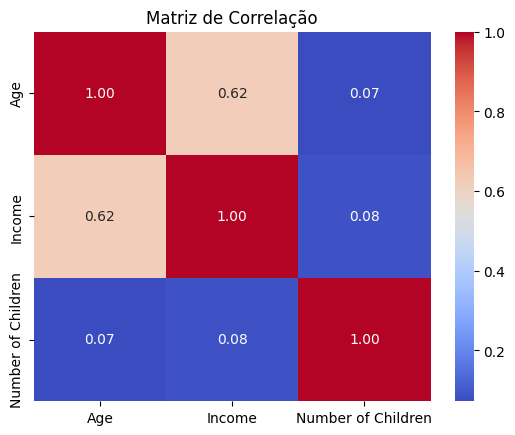

In [25]:
corr = df.select_dtypes(include=["number"]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de Correlação')
plt.show()

**B) Você encontrou variáveis que tem uma média ou alta correlação? Se sim, quais? Te parece fazer sentido essas variáveis terem alta correlação? Justifique.**

Foi encontrado uma alta relação de Salário e Idade. Mas não parece fazer tanto sentido, já que na análise bivariada não foi identificado uma relaçção clara, posi os pontos estavam amplamente distribuidos no gráfico de dispersão, sem um padrão evidente que indique influência direta. Só sendo possível identificar esse padão em poucos casos, como a partie de 140k, onde passamos a ter apenas clientes acima dos 40 anos, mas são poucos os dados.



**C) Temos muitos atributos categóricos nessa base, não? Vamos realizar a o tratamento desses atributos utilizando Label Encoder ou one hot. Após, exclua as colunas categóricas.**

In [26]:
# Criando e aplicando um mapeamento manual para 'Credit Score' e 'Home Ownership'

mapeamento = {
    'Credit Score': {'Low': 0, 'Average': 1, 'High': 2},
    'Home Ownership': {'Rented': 0, 'Owned': 1}
}

# Aplicando os mapeamentos
df[list(mapeamento.keys())] = df[list(mapeamento.keys())].apply(lambda col: col.map(mapeamento[col.name]))


Por que foi feito o mapeamento manuel para essas colunas?

Afim de garantir que o valor 0 fique para rented e 1 para owned. 
Considerando a variável Home Ownership como categórica ordinal, desse forma garantimos a ordem sequencial de baixo = 0, medio = 1 e alto =2 

In [27]:
# Realizando o LaberEncoder
label = LabelEncoder()
df["Gender_Encoded"] = label.fit_transform(df["Gender"])
df["Marital_Status_Encoded"] = label.fit_transform(df["Marital Status"])

In [28]:
# Realizando o One-Hot-Encoder
df = pd.get_dummies(df,columns=['Education'], prefix='Education', drop_first=True)

In [29]:
# Transformando os dados boleanos em inteiros
for column in df.columns:
    if df[column].dtype == 'bool':
        df[column] = df[column].astype(int)

In [30]:
# Verificando as modificações
df.tail(5)

,Age,Gender,Income,Marital Status,Number of Children,Home Ownership,Credit Score,Faixa Etária,Gender_Encoded,Marital_Status_Encoded,Education_Bachelor's Degree,Education_Doctorate,Education_High School Diploma,Education_Master's Degree
159,29,Female,27500.0,Single,0,0,0,25-35,0,1,0,0,1,0
160,34,Male,47500.0,Single,0,0,1,25-35,1,1,0,0,0,0
161,39,Female,62500.0,Married,2,1,2,35-45,0,0,1,0,0,0
162,44,Male,87500.0,Single,0,1,2,35-45,1,1,0,0,0,1
163,49,Female,77500.0,Married,1,1,2,45-55,0,0,0,1,0,0


Legendas:
Gender - Female: 0 \ Male: 1
Marital Status - Single:1 \ Married: 0 
Home Ownership - Rented: 0, Owned: 1
Credit Score - Low: 0, Average: 1, High: 2

In [31]:
df = df.drop(columns=['Gender', 'Marital Status'])

**D) Vamos plotar novamente a correlação, agora observando com as variáveis categóricas. Identifique se temos novas variáveis com forte correlação.**

In [32]:
df['Home Ownership'].astype(int)

0      0
1      1
2      1
3      1
4      1
      ..
159    0
160    0
161    1
162    1
163    1
Name: Home Ownership, Length: 164, dtype: int32

In [33]:
df.tail()

,Age,Income,Number of Children,Home Ownership,Credit Score,Faixa Etária,Gender_Encoded,Marital_Status_Encoded,Education_Bachelor's Degree,Education_Doctorate,Education_High School Diploma,Education_Master's Degree
159,29,27500.0,0,0,0,25-35,0,1,0,0,1,0
160,34,47500.0,0,0,1,25-35,1,1,0,0,0,0
161,39,62500.0,2,1,2,35-45,0,0,1,0,0,0
162,44,87500.0,0,1,2,35-45,1,1,0,0,0,1
163,49,77500.0,1,1,2,45-55,0,0,0,1,0,0


In [34]:
df = df.drop(['Faixa Etária'], axis=1)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            164 non-null    int32  
 1   Income                         164 non-null    float64
 2   Number of Children             164 non-null    int64  
 3   Home Ownership                 164 non-null    int64  
 4   Credit Score                   164 non-null    int64  
 5   Gender_Encoded                 164 non-null    int32  
 6   Marital_Status_Encoded         164 non-null    int32  
 7   Education_Bachelor's Degree    164 non-null    int32  
 8   Education_Doctorate            164 non-null    int32  
 9   Education_High School Diploma  164 non-null    int32  
 10  Education_Master's Degree      164 non-null    int32  
dtypes: float64(1), int32(7), int64(3)
memory usage: 9.7 KB


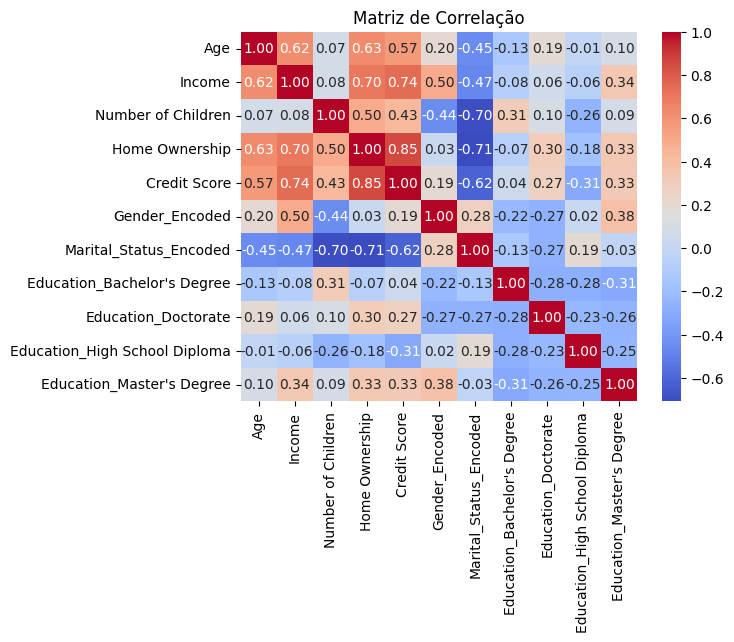

In [36]:
corr = df.select_dtypes(include=["number"]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de Correlação')
plt.show()

Agora com toda nossa base de dados sendo levada em consideração na correlação, vamos analisar as correlações fortes com a nossa variável alvo, que é a Score de Crédito.

Credit Score x Home Ownership (0.85) - Indica que pessoas que possuem imóvel próprio tendem a ter um Score de Crédito melhor.  
Credit Score x Income (0.74) - Sugere que pessoas com rendas mais altas frequentemente apresentam melhores pontuações de crédito.  
Credit Score x Age (0.57) - Indica que pessoas mais velhas tendem a ter um score de crédito melhor.  
Credit Score x Matrial Status (-0.62) - Indica que pessoas casados tendem a ter um Score de crédito melhor. 

Além da variável alvo, percebemos variáveis que apresentam correlações interessantes, como: 

Home Ownership x Matrial Status (-0.71) - Indica que pessoas casadas têm maior propensão a serem proprietárias de imóveis.  
Home Ownership x Income (0.70) - Indica que, à medida que a renda aumenta, há uma tendência maior das pessoas possuírem imóveis.  
Home Ownership x Age (0.63) - Indica que pessoas mais velhas têm maior probabilidade de possuir imóveis.  
Income x Age (0.62) - Quanto maior a idade, maior tende a ser a renda.  
Marital Status_Encoded x Number of Children (-0.70) - Pessoas casadas tendem a ter mais filhos.




**F) Faça a separação da base em treino e teste e verifique utilizando shape:**

In [37]:
# importando a biblioteca
from sklearn.model_selection import train_test_split

In [38]:
# Separar os dados em features (X) e o alvo (y)
X = df.drop('Credit Score', axis=1)  # Considerando que 'Credit Score' é a coluna a ser predita
y = df['Credit Score']

# Separar os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [39]:
# Verificando se as bases estão com os tamanhos de acordo.

print('\n'.join([
    f'X_train: {X_train.shape}',
    f'X_test: {X_test.shape}',
    f'y_train: {y_train.shape}',
    f'y_test: {y_test.shape}'
]))

X_train: (123, 10)
X_test: (41, 10)
y_train: (123,)
y_test: (41,)


**G) É hora de verificar se nossa coluna de Score de crédito está balanceada, verifique através de um gráfico e traga sua opinião acerca do balanceamento.**

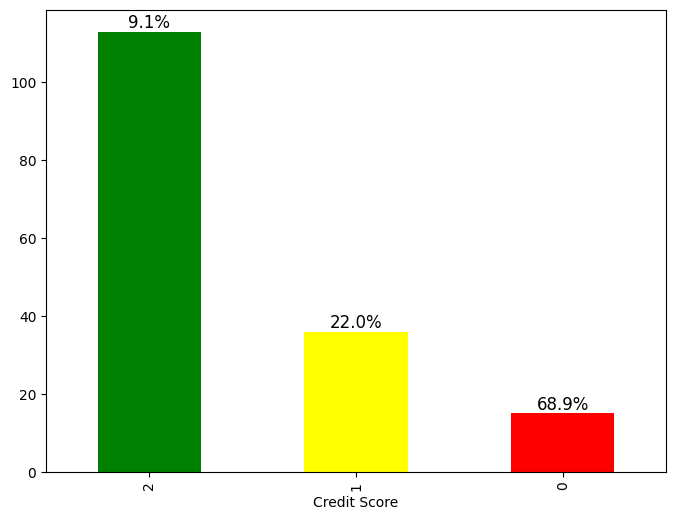

In [40]:
# Calculando os valores e os percentuais
churn_counts = df['Credit Score'].value_counts()
percentages = (churn_counts / churn_counts.sum()) * 100

plt.figure(figsize=(8, 6))
ax = churn_counts.plot(kind='bar', color=['green', 'yellow', 'red'])

for i, count in enumerate(churn_counts):
    plt.text(i, count + 1, f"{percentages[i]:.1f}%", ha='center', fontsize=12)
plt.show()

**H) Vamos realizar o balancecamento dos dados da coluna de credit score.**
Se lembre que realizazmos apenas para a base de treino.

In [41]:
from imblearn.over_sampling import SMOTE

# Criar uma instância do SMOTE
smote = SMOTE(random_state=42)

# Aplicar o SMOTE aos dados de treinamento (X_train, y_train)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verificar a distribuição das classes após o balanceamento
print("Distribuição das classes após o balanceamento:")
print(y_train_balanced.value_counts()) 

Distribuição das classes após o balanceamento:
Credit Score
1    84
0    84
2    84
Name: count, dtype: int64


In [42]:
# Salvando as df

y_train_balanced.to_csv('y_train_balanced.csv', index=False)
X_train_balanced.to_csv('X_train_balanced.csv', index=False)
y_test.to_csv('y_test.csv', index=False)
X_test.to_csv('X_test.csv', index=False)